# Table on Content
    1. Importing Libraries & dataset 'listing short'
    2. Dataset Exploration
      2.1 Price: Outliers Analysis
      2.2 Minimum_nights: Outliers Analysis
      2.3 Number_of_reviews: Outliers Analysis
      2.4 Calculated_host_listings_count: Outliers Analysis
    3. Data Wrangling
      3.1 Dropping Columns
      3.2 Mixed Data Types
      3.3 Change data types
    4. Consistency Checks: Duplicates and Missing Values
      4.1 Missing Values  
        4.1.1 Missing Values: Price - Mean
        4.1.2 Missing Values: reviews_per_month - Drop nan
      4.2 Duplicates
    5. Export final dataset

# 1. Importing Libraries & dataset 'listing short'

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'/Users/Dulce/Dec2024 - Airbnb Berlin'

In [3]:
# Import 'listing short'
listing_short = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'listings_short.csv'))

In [4]:
listing_short.reset_index(drop=True, inplace=True)
listing_short.index = range(1, len(listing_short) + 1)

# 2. Dataset Exploration

In [5]:
listing_short.shape

(13326, 18)

In [6]:
listing_short.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,3176,Rental unit in Berlin ¬∑ ‚òÖ4.63 ¬∑ 1 bedroom ...,3718,Britta,Pankow,Prenzlauer Berg Suedwest,5.253.471,134.181,Entire home/apt,83.0,63,148,25/5/23,0.8,1,15,1,No
2,9991,Rental unit in Berlin ¬∑ ‚òÖ5.0 ¬∑ 4 bedrooms ...,33852,Philipp,Pankow,Prenzlauer Berg Suedwest,5.253.269,1.341.805,Entire home/apt,180.0,6,7,4/1/20,0.1,1,47,0,Yes
3,183988,Rental unit in Berlin ¬∑ ‚òÖ4.69 ¬∑ 1 bedroom ...,882801,Minel,Charlottenburg-Wilm.,Neue Kantstrasse,5.250.001,1.330.349,Entire home/apt,116.0,2,570,26/11/23,3.9,1,336,50,Yes
4,14325,Rental unit in Berlin ¬∑ ‚òÖ4.68 ¬∑ Studio ¬∑ ...,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,5.254.813,1.340.366,Entire home/apt,70.0,150,26,30/11/23,0.2,4,107,1,No
5,16644,Condo in Berlin ¬∑ ‚òÖ4.72 ¬∑ 1 bedroom ¬∑ 1 b...,64696,Rene,Friedrichshain-Kreuzberg,noerdliche Luisenstadt,5.250.312,1.343.508,Entire home/apt,90.0,93,48,14/12/17,0.3,2,225,0,No


In [7]:
listing_short.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
13322,"1,05E+18",Rental unit in Berlin ¬∑ ‚òÖNew ¬∑ 1 bedroom ¬...,168840227,Rounak,Pankow,Prenzlauer Berg Nordwest,525.529.052,134.002.291,Entire home/apt,47.0,1,0,NaN,NaN,1,231,0,No
13323,"1,05E+18",Rental unit in Berlin ¬∑ ‚òÖNew ¬∑ 1 bedroom ¬...,551079357,Esra,Mitte,Alexanderplatz,5.252.235.595.476.660,13.426.043.574.627.400,Entire home/apt,87.0,2,0,NaN,NaN,1,65,0,No
13324,"1,05E+18",Rental unit in Berlin ¬∑ ‚òÖNew ¬∑ 1 bedroom ¬...,551034226,Pietro,Charlottenburg-Wilm.,Volkspark Wilmersdorf,5.248.578.222.386.250,13.335.903.994.739.000,Entire home/apt,58.0,1,0,NaN,NaN,1,171,0,No
13325,"1,05E+18",Rental unit in Berlin ¬∑ ‚òÖNew ¬∑ 3 bedrooms ...,29385449,Luis,Mitte,Brunnenstr. Nord,525.441.045,133.733.864,Entire home/apt,161.0,1,0,NaN,NaN,3,11,0,Yes
13326,"1,05E+18",Rental unit in Berlin ¬∑ ‚òÖNew ¬∑ Studio ¬∑ 2...,175463482,Flo,Friedrichshain-Kreuzberg,Frankfurter Allee Sued FK,5.251.265.246.077.310,1.346.329.262.327.970,Entire home/apt,94.0,1,0,NaN,NaN,9,361,0,Yes


In [8]:
listing_short.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [9]:
listing_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13326 entries, 1 to 13326
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13326 non-null  object 
 1   name                            13326 non-null  object 
 2   host_id                         13326 non-null  int64  
 3   host_name                       13317 non-null  object 
 4   neighbourhood_group             13326 non-null  object 
 5   neighbourhood                   13326 non-null  object 
 6   latitude                        13326 non-null  object 
 7   longitude                       13326 non-null  object 
 8   room_type                       13326 non-null  object 
 9   price                           9373 non-null   float64
 10  minimum_nights                  13326 non-null  int64  
 11  number_of_reviews               13326 non-null  int64  
 12  last_review                     

In [10]:
listing_short.describe()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.332600e+04,9373.000000,13326.000000,13326.000000,10326.000000,13326.000000,13326.000000,13326.000000
mean,1.482092e+08,124.515203,42.800240,37.256791,1.155481,9.276527,120.589449,9.100030
std,1.686415e+08,383.772383,53.964507,82.872454,1.821908,31.790406,135.095573,20.628583
min,1.581000e+03,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.362760e+07,62.000000,2.000000,1.000000,0.100000,1.000000,0.000000,0.000000
50%,6.109478e+07,91.000000,6.000000,7.000000,0.500000,1.000000,58.000000,1.000000
75%,2.577263e+08,139.000000,92.000000,33.000000,1.600000,3.000000,257.000000,10.000000
max,5.510794e+08,24999.000000,1100.000000,2363.000000,56.700000,231.000000,365.000000,716.000000


- The max of all the columns (except host_id) seems to be outliers because are too far away from the mean and the percentile 75%.
- Price seems to have some missing values.

## 2.1 Price: Outliers Analysis

<Axes: xlabel='price', ylabel='price'>

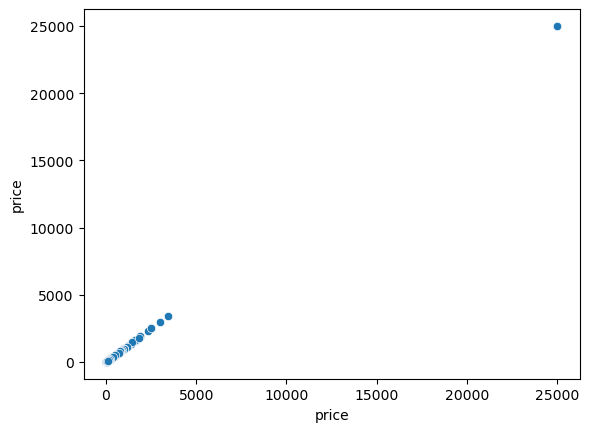

In [11]:
# Create scatterplot to analyze outliers
sns.scatterplot(x = 'price', y = 'price', data = listing_short)

In [12]:
# Set outlier criteria "price > 5000 = outlier"
listing_short.loc[listing_short['price'] > 5000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
7106,41897771,Hotel in Berlin ¬∑ 1 bedroom ¬∑ 1 bed ¬∑ 1 pri...,7031936,Hotel,Marzahn - Hellersdorf,Hellersdorf-Nord,5.253.664,1.360.221,Private room,24999.0,92,2,16/8/21,0.1,5,365,0,No
7129,41924747,Hotel in Berlin ¬∑ 2 bedrooms ¬∑ 3 beds ¬∑ 1 p...,7031936,Hotel,Marzahn - Hellersdorf,Hellersdorf-Nord,5.253.749,1.360.226,Private room,24999.0,92,2,23/7/22,0.1,5,365,0,No


In [13]:
# Mark outliers as Missing
listing_short.loc[listing_short['price'] > 5000, 'price'] = np.nan

<Axes: xlabel='price', ylabel='price'>

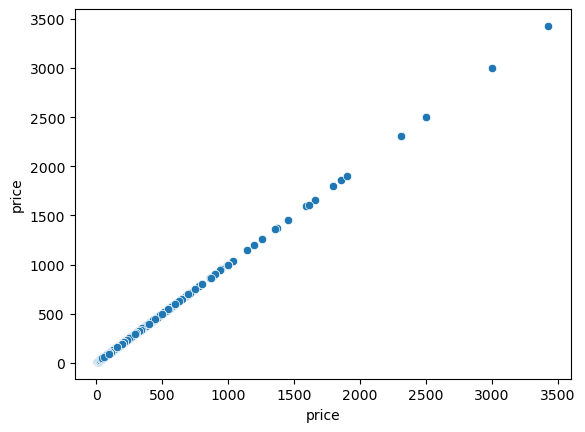

In [14]:
# Redo scatterplot without outliers
sns.scatterplot(x = 'price', y = 'price', data = listing_short)

Now, all the price values are correctly between 9 and 3500 €.

## 2.2 Minimum_nights: Outliers Analysis

<Axes: xlabel='minimum_nights', ylabel='minimum_nights'>

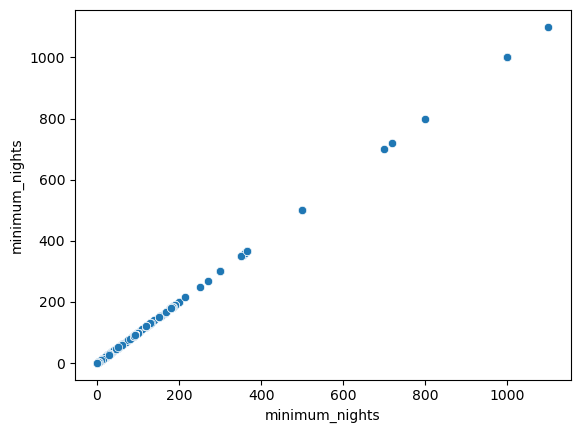

In [15]:
# Create scatterplot to analyze outliers
sns.scatterplot(x = 'minimum_nights', y = 'minimum_nights', data = listing_short)

In [16]:
# Set outlier criteria "minimum_nights > 365 = outlier" --> Bookings are based on the 365 days of the calendar 2024. It cannot be greater than a year.
listing_short.loc[listing_short['minimum_nights'] > 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
195,584757,Rental unit in Berlin ¬∑ ‚òÖ4.78 ¬∑ 1 bedroom ...,2881484,Daniel,Pankow,Prenzlauer Berg Nordwest,5.255.438,1.340.816,Private room,20.0,1000,25,28/6/20,0.2,1,365,0,No
342,1106372,Rental unit in Berlin ¬∑ ‚òÖ4.61 ¬∑ 1 bedroom ...,6074400,Eliav,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,5.248.918,1.339.042,Entire home/apt,NaN,1100,115,18/4/16,0.9,1,0,0,No
830,3584113,Rental unit in Berlin ¬∑ ‚òÖ4.64 ¬∑ 1 bedroom ...,5222355,Nadine,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,5.249.045,1.338.006,Entire home/apt,45.0,800,96,5/1/20,0.9,1,365,0,No
888,4003140,Loft in Berlin ¬∑ ‚òÖ4.70 ¬∑ 1 bedroom ¬∑ 1 be...,5781298,Paul,Mitte,Brunnenstr. Nord,5.254.448,133.786,Private room,70.0,500,10,11/11/18,0.1,1,365,0,No
1395,6670861,Rental unit in Berlin ¬∑ ‚òÖ4.93 ¬∑ 1 bedroom ...,34914724,Fran√ßois,Neukoelln,Schillerpromenade,524.749,1.342.182,Entire home/apt,35.0,700,14,27/6/18,0.1,1,365,0,No
1421,6704144,Rental unit in Berlin ¬∑ ‚òÖ4.67 ¬∑ 1 bedroom ...,13498367,Veit,Pankow,Prenzlauer Berg Ost,525.346,1.344.446,Private room,19.0,1000,3,7/9/15,0.0,1,365,0,No
1651,7682402,Condo in Berlin ¬∑ ‚òÖ4.40 ¬∑ 1 bedroom ¬∑ 3 b...,40347565,Rob,Friedrichshain-Kreuzberg,Frankfurter Allee Sued FK,5.250.826,1.346.067,Private room,30.0,1000,10,4/4/18,0.1,1,365,0,No
3392,17836549,Rental unit in Berlin ¬∑ ‚òÖ4.89 ¬∑ 1 bedroom ...,9194512,Joy,Neukoelln,Neukoellner Mitte/Zentrum,5.248.168,1.343.286,Private room,45.0,1000,18,28/4/21,0.2,3,0,0,Yes
3450,18093451,Rental unit in Berlin ¬∑ ‚òÖ4.79 ¬∑ 2 bedrooms...,124611709,Norbert,Reinickendorf,Ost 2,5.257.681,1.335.522,Entire home/apt,49.0,1000,19,11/5/20,0.2,1,363,0,No
5056,27923447,Rental unit in Berlin ¬∑ ‚òÖ5.0 ¬∑ 1 bedroom ¬...,4466876,Tra My,Neukoelln,Schillerpromenade,5.246.673,134.251,Private room,115.0,1000,9,1/7/22,0.1,1,108,0,No


Those 13 hosts are offering long-term bookings. They are not outliers, but users which use Airbnb as renting platform for long-term periods. The maximum that Airbnb website allows to put as "minimum_nights" is 1000, therefore some of the hosts are offering the appartments/rooms for this minimum period. 

## 2.3 Number_of_reviews: Outliers Analysis

<Axes: xlabel='number_of_reviews', ylabel='number_of_reviews'>

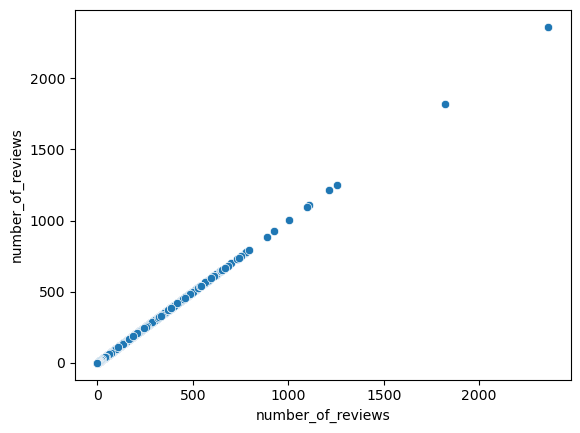

In [17]:
# Create scatterplot to analyze outliers
sns.scatterplot(x = 'number_of_reviews', y = 'number_of_reviews', data = listing_short)

In [18]:
# Set outlier criteria "number_of_reviews > 1000 = outlier"
listing_short.loc[listing_short['number_of_reviews'] > 1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5972,34294913,Aparthotel in Berlin ¬∑ ‚òÖ4.52 ¬∑ 1 bedroom ¬...,258761653,Nena Apartments Metropolpark Berlin,Mitte,Alexanderplatz,5.251.253,1.341.286,Entire home/apt,99.0,1,2363,19/12/23,42.2,2,0,716,Yes
6287,36339325,Hostel in Berlin ¬∑ ‚òÖ4.43 ¬∑ 1 bedroom ¬∑ 2 ...,270945970,Generator,Mitte,Alexanderplatz,5.252.619,1.339.199,Shared room,18.0,1,1111,4/12/23,20.8,8,341,444,Yes
7494,43798011,Aparthotel in Berlin ¬∑ ‚òÖ4.52 ¬∑ 1 bedroom ¬...,345525433,Nena Apartments Kreuzberg 61,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,52.495.548.248.291.000,13.396.210.670.471.100,Entire home/apt,93.0,1,1253,10/12/23,32.0,4,287,346,Yes
7743,45475252,Serviced apartment in Berlin ¬∑ ‚òÖ4.78 ¬∑ Stu...,367824579,Numa | Nook,Mitte,Alexanderplatz,5.252.391,1.339.975,Entire home/apt,94.0,1,1003,11/12/23,26.0,5,336,315,Yes
7969,46864858,Serviced apartment in Berlin ¬∑ ‚òÖ4.68 ¬∑ 1 b...,371776088,Numa | Sketch,Friedrichshain-Kreuzberg,Frankfurter Allee Sued FK,5.251.177,134.559,Entire home/apt,75.0,1,1097,11/12/23,30.3,8,0,473,Yes
8090,49070135,Serviced apartment in Berlin ¬∑ ‚òÖ4.77 ¬∑ Stu...,290026890,Numa | Drift (Ex. Gaijin),Tempelhof - Schoeneberg,Schoeneberg-Nord,525.002,1.335.273,Entire home/apt,73.0,1,1819,29/11/23,56.7,8,335,348,Yes
8209,49844243,Aparthotel in Berlin ¬∑ ‚òÖ4.56 ¬∑ 1 bedroom ¬...,401986350,Nena Apartments Moritzplatz,Friedrichshain-Kreuzberg,Suedliche Friedrichstadt,5.250.173,1.341.092,Entire home/apt,116.0,1,1215,10/12/23,38.7,2,194,345,Yes


There are 7 listings with more than 1000 reviews. The names and the license checking shows they belong to business and not physical people. It may happen that those entities collect reviews with specific campaigns within and without Airbnb or basically that those listings have high traffic of visitors. Any case, they are not outliers which need to be removed.

## 2.4 Calculated_host_listings_count: Outliers Analysis

<Axes: xlabel='calculated_host_listings_count', ylabel='calculated_host_listings_count'>

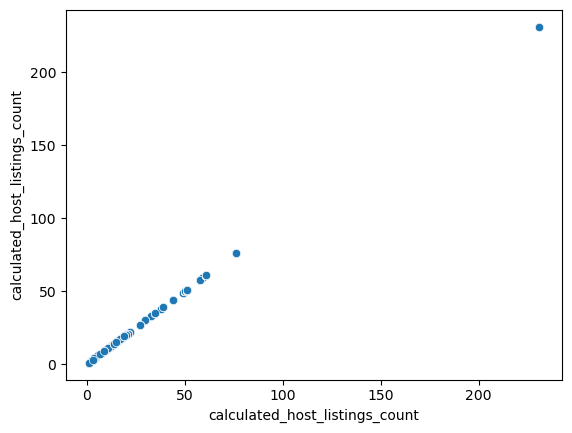

In [19]:
# Create scatterplot to analyze outliers
sns.scatterplot(x = 'calculated_host_listings_count', y = 'calculated_host_listings_count', data = listing_short)

In [20]:
# Set outlier criteria "calculated_host_listings_count > 100 = outlier"
listing_short.loc[listing_short['calculated_host_listings_count'] > 100]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
8891,54025960,Rental unit in Berlin ¬∑ 1 bedroom ¬∑ 1 bed ¬∑...,434485440,Blueground,Charlottenburg-Wilm.,Kurfuerstendamm,5.250.057.469.999.990,13.329.638,Entire home/apt,103.0,90,0,NaN,NaN,231,184,0,Yes
8895,54025990,Rental unit in Berlin ¬∑ Studio ¬∑ 1 bed ¬∑ 1 ...,434485440,Blueground,Charlottenburg-Wilm.,Kurfuerstendamm,5.250.057.469.999.990,13.329.638,Entire home/apt,64.0,90,0,NaN,NaN,231,365,0,Yes
8896,54026053,Rental unit in Berlin ¬∑ Studio ¬∑ 1 bed ¬∑ 1 ...,434485440,Blueground,Charlottenburg-Wilm.,Kurfuerstendamm,5.250.057.469.999.990,13.329.638,Entire home/apt,62.0,90,0,NaN,NaN,231,365,0,Yes
8897,54026099,Rental unit in Berlin ¬∑ Studio ¬∑ 1 bed ¬∑ 1 ...,434485440,Blueground,Charlottenburg-Wilm.,Kurfuerstendamm,5.250.057.469.999.990,13.329.638,Entire home/apt,133.0,90,0,NaN,NaN,231,0,0,Yes
9060,"5,69E+17",Rental unit in Berlin ¬∑ 1 bedroom ¬∑ 1 bed ¬∑...,434485440,Blueground,Mitte,Tiergarten Sued,525.013.987,133.583.716,Entire home/apt,116.0,90,0,NaN,NaN,231,163,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,"1,04E+18",Rental unit in Berlin ¬∑ ‚òÖNew ¬∑ 1 bedroom ¬...,434485440,Blueground,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,524.854.958,133.746.238,Entire home/apt,63.0,90,0,NaN,NaN,231,365,0,Yes
13304,"1,05E+18",Rental unit in Berlin ¬∑ ‚òÖNew ¬∑ Studio ¬∑ 1...,434485440,Blueground,Neukoelln,Neukoellner Mitte/Zentrum,524.671.824,134.366.736,Entire home/apt,66.0,90,0,NaN,NaN,231,365,0,Yes
13305,"1,05E+18",Rental unit in Berlin ¬∑ ‚òÖNew ¬∑ 1 bedroom ¬...,434485440,Blueground,Friedrichshain-Kreuzberg,Frankfurter Allee Nord,525.219.289,13.452.605,Entire home/apt,91.0,90,0,NaN,NaN,231,365,0,Yes
13306,"1,05E+18",Rental unit in Berlin ¬∑ ‚òÖNew ¬∑ Studio ¬∑ 1...,434485440,Blueground,Steglitz - Zehlendorf,Drakestr.,524.439.971,133.167.006,Entire home/apt,57.0,90,0,NaN,NaN,231,365,0,Yes


The 231 listings belong to Blueground, a company which owns several buildings in Berlin. It is a specific case, but it is not an outlier. 

# 3. Data Wrangling

## 3.1 Dropping Columns

In [21]:
# Delete unnecessary columns to reduce volume
columns_to_drop = ['number_of_reviews_ltm']
listing_short = listing_short.drop(columns=columns_to_drop)
listing_short.shape

(13326, 17)

## 3.2 Mixed Data Type

In [22]:
for col in listing_short.columns.tolist():
  weird = (listing_short[[col]].map(type) != listing_short[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (listing_short[weird]) > 0:
    print (col)

host_name
last_review


In [23]:
# Change host_name data type to string
listing_short['host_name'] = listing_short['host_name'].astype('str')
listing_short['host_name'].dtype

dtype('O')

In [24]:
# Change last_review data type to string
listing_short['last_review'] = listing_short['last_review'].astype('str')
listing_short['last_review'].dtype

dtype('O')

In [25]:
# Change reviews_per_month data type to string
listing_short['reviews_per_month'] = listing_short['reviews_per_month'].astype('float')
listing_short['reviews_per_month'].dtype

dtype('float64')

In [26]:
# Change license data type to string
listing_short['license'] = listing_short['license'].astype('str')
listing_short['license'].dtype

dtype('O')

## 3.3 Change data types

In [27]:
# Change host_id data type to string
listing_short['host_id'] = listing_short['host_id'].astype('str')
listing_short['host_id'].dtype

dtype('O')

# 4. Consistency Checks: Duplicates and Missing Values

## 4.1 Missing Values

In [28]:
listing_short.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3955
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 3000
calculated_host_listings_count       0
availability_365                     0
license                              0
dtype: int64

### 4.1.1 Missing Values: Price - Mean

In [29]:
# Replace by Mean in order to avoid missing values in Price
listing_short['price'].fillna(124.515203, inplace=True)

In [30]:
# Check for missing values in the 'price' column
missing_price = listing_short['price'].isnull().sum()

# Display the number of missing values
print(f"Number of missing values in 'price' column: {missing_price}")


Number of missing values in 'price' column: 0


### 4.1.2 Missing Values: reviews_per_month - Drop nan

In [31]:
# Drop missing values because we will check the reviews with a more accurate dataset in the future
listing_short.dropna(subset = ['reviews_per_month'], inplace = True)

## 4.2 Duplicates

In [32]:
listing_short_dups = listing_short[listing_short.duplicated()]
listing_short_dups

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,license


No duplicates found.

In [33]:
listing_short.shape

(10326, 17)

# 5. Export final dataset

In [34]:
listing_short.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'listing_short_clean.pkl'))

In [35]:
listing_short.to_excel(os.path.join(path, '02 Data','Prepared Data', 'listing_short_clean.xlsx'))